In [1]:
##we have loaded the python packages
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('C:\\Users\\Eathish\\Downloads\\archive (1)\\insurance_data.csv')

In [49]:
##performing data pre processing steps

In [4]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [7]:
df.shape

(27, 2)

In [8]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [9]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

C:\Users\Eathish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eathish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


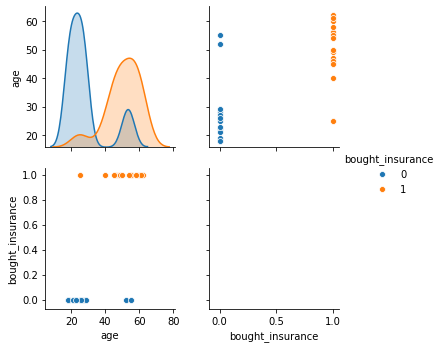

In [10]:
sb.pairplot(df,hue='bought_insurance')

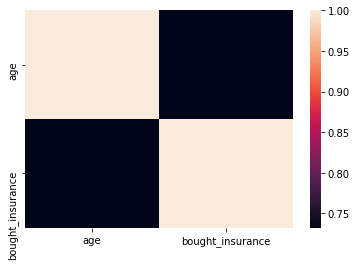

In [11]:
sb.heatmap(df.corr()) 
plt.show()

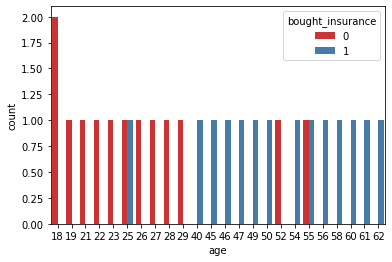

In [13]:
## data visualization
sb.countplot(x='age',hue='bought_insurance',data=df,palette="Set1")

In [14]:
##now we are using logistic regression

In [16]:
X=df.drop(['bought_insurance'],axis=1)
y=df['bought_insurance']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)##50:50 train:test ratio

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_predict = logistic.predict(X_test)
y_predict = logistic.predict(X_test)

C:\Users\Eathish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
print('Accuracy:',accuracy_score(y_test,y_predict))
print('Classification Report',classification_report(y_test,y_predict))

Accuracy: 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [22]:
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[3 0]
 [0 3]]


Text(0.5, 15.0, 'Predicted')

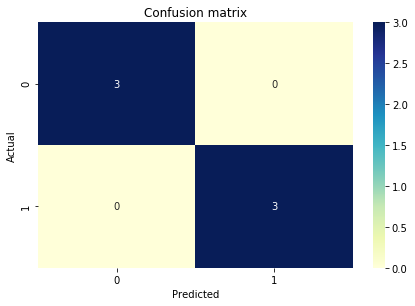

In [25]:
sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

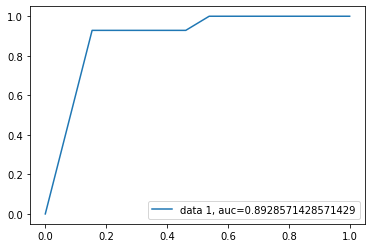

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba = logistic.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##naive bayes

In [37]:
X=df.drop(['bought_insurance'],axis=1)
y=df['bought_insurance']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)##80:20 train:test ratio
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [38]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Accuracy is : 0.8333333333333334
Classification Report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



##knn classification

In [42]:
X=df.drop(['bought_insurance'],axis=1)
y=df['bought_insurance']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)##80:20 train:test ratio
neighbors = np.arange(1,5)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

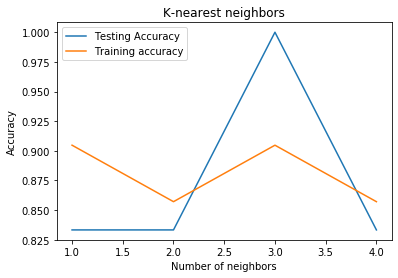

In [43]:
plt.title('K-nearest neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8333333333333334

In [45]:
y_predict = knn.predict(X_test)
print("Accuracy is :",accuracy_score(y_test,y_predict))
print('Classification Report',classification_report(y_test,y_predict))

Accuracy is : 0.8333333333333334
Classification Report               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [46]:
##decision tree

In [47]:
X=df.drop(['bought_insurance'],axis=1)
y=df['bought_insurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)##80:20 train:test ratio
tree=DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)
treeprediction=tree.predict(X_test)

In [48]:
print('Accuracy:',accuracy_score(y_test,treeprediction))
print('Classification Report',classification_report(y_test,treeprediction))

Accuracy: 0.8333333333333334
Classification Report               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [50]:
##we have used the accuracy,classicfication report where we have metrics f1 score and r2 score and we have got the accuracy of 1 in logistic regression